In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [100]:
df = pd.read_csv('cancer.csv')
print(df.head())

    blood  chances
0  153.22    38.23
1  150.51    38.87
2  154.65    41.75
3  151.77    39.35
4  164.74    47.87


Text(0, 0.5, 'Chances of Cancer')

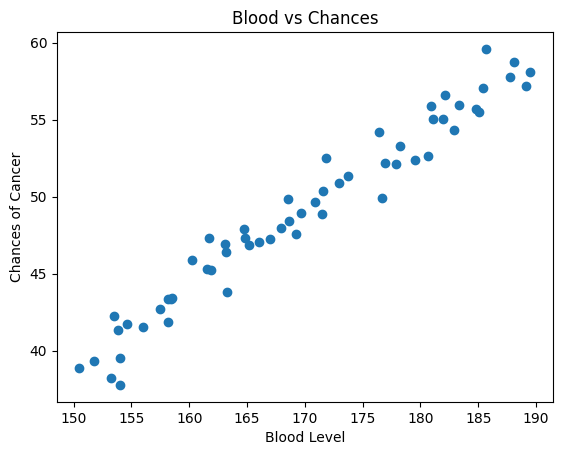

In [101]:
## Scatter Plot
plt.scatter(df['blood'], df['chances'])
plt.title('Blood vs Chances')
plt.xlabel('Blood Level')
plt.ylabel('Chances of Cancer')

In [102]:
## finding correlation
df.corr()

,blood,chances
blood,1.0000,0.9777
chances,0.9777,1.0000


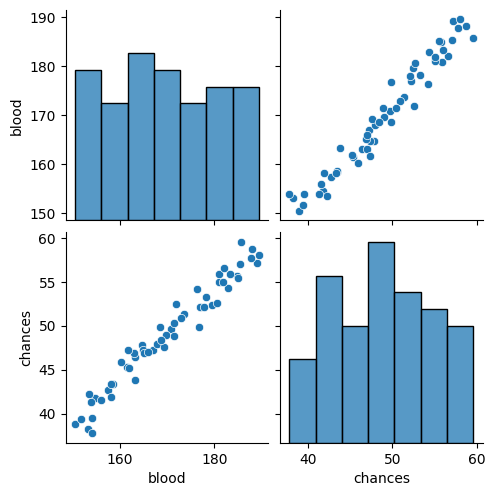

In [103]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [104]:
## Independent and Dependent Variables
df.head()
X = df[['blood']]
## Independent feature must be in Dataframe or 2D array
print(X.shape)
Y = df['chances']
## Dependent feature can be in Series or 1D array
Y

(58, 1)


0     38.23
1     38.87
2     41.75
3     39.35
4     47.87
5     42.22
6     42.67
7     43.37
8     45.31
9     43.42
10    45.90
11    41.54
12    43.82
13    46.43
14    46.93
15    47.29
16    47.26
17    47.93
18    49.66
19    47.55
20    49.82
21    51.35
22    50.91
23    52.52
24    54.20
25    52.20
26    52.39
27    53.28
28    55.91
29    54.30
30    49.88
31    55.71
32    56.63
33    57.06
34    55.47
35    59.59
36    48.88
37    57.19
38    58.06
39    37.77
40    41.35
41    39.54
42    41.88
43    43.36
44    45.23
45    47.28
46    46.86
47    47.02
48    48.95
49    50.38
50    52.11
51    48.39
52    52.66
53    55.04
54    55.02
55    55.96
56    57.76
57    58.75
Name: chances, dtype: float64

In [105]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=21)
print(X_train)
print(X_test)

     blood
33  185.37
0   153.22
13  163.17
28  180.92
57  188.08
45  164.83
52  180.67
56  187.70
47  166.05
29  182.92
40  153.87
1   150.51
27  178.27
24  176.45
32  182.11
3   151.77
26  179.55
16  167.01
39  154.02
51  168.63
6   157.48
18  170.92
37  189.12
43  158.20
5   153.53
12  163.26
42  158.21
20  168.51
38  189.50
36  171.47
41  154.03
44  161.88
46  165.15
8   161.52
10  160.24
49  171.56
34  185.10
35  185.70
54  181.94
48  169.69
4   164.74
15  161.71
9   158.54
     blood
7   158.43
50  177.88
53  181.04
25  176.93
14  163.06
2   154.65
23  171.81
31  184.83
17  167.94
55  183.30
30  176.68
21  173.70
19  169.27
11  156.01
22  172.96


In [106]:
## Standardization
## Bringing all features to same scale
## where we find the z_score of each values in our independent features
## z_score = (x - mean) / std_dev

## we do not standarize dependent variable in simple linear regression becaue there we apply the gradient descent

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
## because we use the same mean and std_dev from training data to transform the test data
X_test = scaler.transform(X_test)
## this is done because we don not want the situation of DATA LEAKAGE, and our model should not know anything about the test data

In [107]:
## apply machine learning algorithm - linear regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [108]:
regression.fit(X_train, Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [109]:
print(regression.coef_)
print(regression.intercept_)

[6.07398392]
48.68093023255813


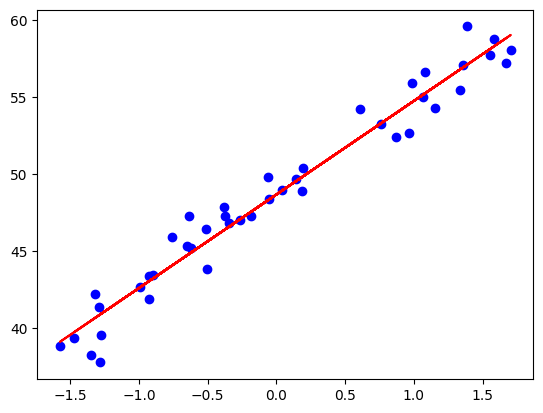

In [110]:
## plot training data and plot best fit line
plt.scatter(X_train, Y_train, color='blue')
plt.plot(X_train, regression.predict(X_train), color='red')

In [111]:
## predict for test data
Y_predict = regression.predict(X_test)

In [112]:
## Performance Matrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [113]:
mse = mean_squared_error(Y_test, Y_predict)
mae = mean_absolute_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 0.8242902392577671
Mean Squared Error: 1.2894068665239027
Root Mean Squared Error: 1.1355205266854063


In [114]:
from sklearn.metrics import r2_score

In [115]:
score = r2_score(Y_test, Y_predict)
print("R2 Score:", score)

R2 Score: 0.9382666263714192


### Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]
#### where: R2: the R2 of the model; n: no. of observations; k: no. of predictor variables

In [116]:
## Adjusted R2 Score
adj_r2 = 1 - (1 - score) * (len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1)
print("Adjusted R2 Score:", adj_r2)

Adjusted R2 Score: 0.9335179053230669


### OLS Linear Regression

In [117]:
import statsmodels.api as sm

In [118]:
model = sm.OLS(Y_train, X_train).fit()
predication = model.predict(X_test)
print(predication)

[-5.52400254  4.41939225  6.03487439  3.93372516 -3.15701447 -7.45644636
  1.31623511  7.97243049 -0.66221927  7.19025085  3.80591802  2.28245702
  0.01771466 -6.76117556  1.90414792]


In [119]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                chances   R-squared (uncentered):                   0.015
Model:                            OLS   Adj. R-squared (uncentered):             -0.008
Method:                 Least Squares   F-statistic:                             0.6534
Date:                Mon, 09 Feb 2026   Prob (F-statistic):                       0.423
Time:                        17:25:08   Log-Likelihood:                         -228.10
No. Observations:                  43   AIC:                                      458.2
Df Residuals:                      42   BIC:                                      460.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Prediction for new Data

In [120]:
regression.predict(scaler.transform([[57.76]]))  ## predict height for 70 kg weight

/Users/pramodkumar/Python/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([-8.3084478])